<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#About" data-toc-modified-id="About-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>About</a></span><ul class="toc-item"><li><span><a href="#Tips" data-toc-modified-id="Tips-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tips</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Tests" data-toc-modified-id="Tests-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tests</a></span><ul class="toc-item"><li><span><a href="#Augment-Function" data-toc-modified-id="Augment-Function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Augment Function</a></span><ul class="toc-item"><li><span><a href="#No-augmentation" data-toc-modified-id="No-augmentation-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>No augmentation</a></span></li><li><span><a href="#Random-augmentation" data-toc-modified-id="Random-augmentation-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Random augmentation</a></span><ul class="toc-item"><li><span><a href="#Control-feature-data-frame" data-toc-modified-id="Control-feature-data-frame-4.1.2.1"><span class="toc-item-num">4.1.2.1&nbsp;&nbsp;</span>Control feature data frame</a></span></li><li><span><a href="#Control-labels" data-toc-modified-id="Control-labels-4.1.2.2"><span class="toc-item-num">4.1.2.2&nbsp;&nbsp;</span>Control labels</a></span></li><li><span><a href="#Test-data-frame" data-toc-modified-id="Test-data-frame-4.1.2.3"><span class="toc-item-num">4.1.2.3&nbsp;&nbsp;</span>Test data frame</a></span></li></ul></li><li><span><a href="#Unsupervised-augmentation" data-toc-modified-id="Unsupervised-augmentation-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Unsupervised augmentation</a></span><ul class="toc-item"><li><span><a href="#Control-data-frames" data-toc-modified-id="Control-data-frames-4.1.3.1"><span class="toc-item-num">4.1.3.1&nbsp;&nbsp;</span>Control data frames</a></span></li><li><span><a href="#Test-data-frames" data-toc-modified-id="Test-data-frames-4.1.3.2"><span class="toc-item-num">4.1.3.2&nbsp;&nbsp;</span>Test data frames</a></span></li></ul></li><li><span><a href="#Supervised-augmentation" data-toc-modified-id="Supervised-augmentation-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Supervised augmentation</a></span><ul class="toc-item"><li><span><a href="#Distance-matrix-for-control-data-frame" data-toc-modified-id="Distance-matrix-for-control-data-frame-4.1.4.1"><span class="toc-item-num">4.1.4.1&nbsp;&nbsp;</span>Distance matrix for control data frame</a></span></li><li><span><a href="#Control-data-frames" data-toc-modified-id="Control-data-frames-4.1.4.2"><span class="toc-item-num">4.1.4.2&nbsp;&nbsp;</span>Control data frames</a></span></li><li><span><a href="#Test-data-frames" data-toc-modified-id="Test-data-frames-4.1.4.3"><span class="toc-item-num">4.1.4.3&nbsp;&nbsp;</span>Test data frames</a></span></li></ul></li></ul></li><li><span><a href="#model_opt_exe-Function" data-toc-modified-id="model_opt_exe-Function-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>model_opt_exe Function</a></span><ul class="toc-item"><li><span><a href="#Test-Group-Stratified-K-fold-CV" data-toc-modified-id="Test-Group-Stratified-K-fold-CV-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Test Group Stratified K-fold CV</a></span></li><li><span><a href="#Unpack-param_grid" data-toc-modified-id="Unpack-param_grid-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Unpack param_grid</a></span></li><li><span><a href="#Test-model_opt_exe" data-toc-modified-id="Test-model_opt_exe-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Test model_opt_exe</a></span></li></ul></li></ul></li></ul></div>

# About

Run tests to ensure that the external functions (functions.py) used across multiple notebooks are working properly.

## Tips

* For writing error messages
    * https://stackoverflow.com/questions/16451514/returning-error-string-from-a-function-in-python
* List of objects: dir()

# Setup

In [149]:
from __future__ import division, print_function, unicode_literals
import numpy as np
from numpy import random
import pandas as pd
import os, sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [150]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "figs"

if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory did not exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.')

Figure directory exists.


In [151]:
# To enable a specified sound to play
from IPython.display import Audio
sound_file = './data/ping.wav'

# Option to play sound at the end of a function with a long run time
Audio(url=sound_file, autoplay=True)

In [166]:
# Import classes and functions used across multiple notebooks
sys.path.append(os.getcwd())
import importlib
import functions as blt
importlib.reload(blt);

Figure directory exists.


# Data

In [5]:
# Read in target (ENM) model feature data
X_enm = pd.read_csv("./data/ENM-preprocessed-feats.csv", 
                    sep='\t', header='infer', index_col=0)

# Read in source (organics) model feature data
X_source = pd.read_csv("./data/organics-preprocessed-feats.csv", 
                       sep='\t', header='infer', index_col=0)

# Read in ENM labels (maximum_weight_fraction)
y_enm = pd.read_csv("./data/ENM-clean.csv", 
                    sep=',', header='infer', usecols=[3])

# Read in organics labels (maximum_weight_fraction)
y_source = pd.read_csv("./data/organics-preprocessed-WF.csv", 
                       sep=',', header='infer')
y_source.index = X_source.index

In [6]:
bin_enm = np.asarray(y_enm.apply(blt.bins, axis=1))
bin_source = np.asarray(y_source.apply(blt.bins, axis=1))

# Tests

In [7]:
def are_equal(df1, df2):
    
    """Tests if two data frames or two arrays are equal."""
    
    if isinstance(df1, pd.DataFrame):
        # Test if data frames are equal
        print(df1.equals(df2))
    else:    
        # Test if arrays are equal
        print(np.array_equal(df1, df2))

## Augment Function

First, each step in the function to be tested is run separately for each type of data augmentation to get "control" data frames. Then I attempt to recreate the same dataframe using the augment function and compare results. If they are the same, it is assumed that the function is working properly.

### No augmentation

In [8]:
# Apply new function with same conditions
X_test, bin_test = blt.augment(aug_type='random', 
                               k=0, 
                               X_enm_train=X_enm, 
                               bin_enm_train=bin_enm, 
                               random_state=31)
are_equal(X_test, X_enm)
are_equal(bin_test, bin_enm)

True
True


In [9]:
# Apply new function with same conditions
X_test, bin_test = blt.augment(aug_type='none', 
                               k=1, 
                               X_enm_train=X_enm, 
                               bin_enm_train=bin_enm, 
                               random_state=31)
are_equal(X_test, X_enm)
are_equal(bin_test, bin_enm)

True
True


In [10]:
# Apply new function with same conditions
X_test, bin_test = blt.augment(aug_type='none', 
                               k=0, 
                               X_enm_train=X_enm, 
                               bin_enm_train=bin_enm, 
                               random_state=31)
are_equal(X_test, X_enm)
are_equal(bin_test, bin_enm)

True
True


### Random augmentation

#### Control feature data frame

In [11]:
from numpy import random

In [12]:
# Randomly sample source (organics) feature data and get list of their indices
idx_match_name = np.asarray(X_source.sample(n=82, 
                            replace=False, 
                            random_state=31, 
                            axis=0).index)
# List first few matches
X_source.loc[idx_match_name[:8],:]

,propMW,propMP,propBP,propLogDensity,absorbent,anti_adhesive_cohesive,antioxidant,antiredeposition_agent,biocide,brightener,...,group_dentalcare,group_deodorant,group_facialcleansingandmoisturizing,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F
28448,180.203,74.45325,272.49400,0.062582,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
12951,194.230,65.76055,273.89350,0.052309,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
1169,154.253,10.43345,227.18250,-0.055024,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
15824,76.095,-31.99570,180.43000,0.004321,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
19654,58.080,-75.59565,44.93675,-0.077275,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
14981,92.094,41.33495,267.43050,0.070407,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3607,196.290,-29.69015,225.63400,-0.031050,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
17803,46.069,-89.54350,73.83620,-0.040005,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [13]:
# Get location of indices
idx_match = [X_source.index.get_loc(i) for i in idx_match_name]
idx_match[:8]

[15510, 7428, 976, 10026, 13062, 9208, 3003, 11351]

In [14]:
# Apply sample selection; Check that list comprehension (above) worked
X_samples = X_source.iloc[idx_match,:]
print(X_samples.shape)
X_samples.head(8)

(82, 38)


,propMW,propMP,propBP,propLogDensity,absorbent,anti_adhesive_cohesive,antioxidant,antiredeposition_agent,biocide,brightener,...,group_dentalcare,group_deodorant,group_facialcleansingandmoisturizing,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F
28448,180.203,74.45325,272.49400,0.062582,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
12951,194.230,65.76055,273.89350,0.052309,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
1169,154.253,10.43345,227.18250,-0.055024,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
15824,76.095,-31.99570,180.43000,0.004321,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
19654,58.080,-75.59565,44.93675,-0.077275,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
14981,92.094,41.33495,267.43050,0.070407,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3607,196.290,-29.69015,225.63400,-0.031050,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
17803,46.069,-89.54350,73.83620,-0.040005,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [15]:
# Concatenate organics samples with ENM data
X_1to1 = pd.concat([X_enm, X_samples], sort=False)
print(X_1to1.shape)
# The first two rows are ENM data, the remainder are organics data
X_1to1.iloc[80:90,:]

(164, 38)


,propMW,propMP,propBP,propLogDensity,absorbent,anti_adhesive_cohesive,antioxidant,antiredeposition_agent,biocide,brightener,...,group_dentalcare,group_deodorant,group_facialcleansingandmoisturizing,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F
80,79.867,1843.00000,2972.00000,0.626340,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
81,107.868,961.78000,2162.00000,1.014730,0,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
28448,180.203,74.45325,272.49400,0.062582,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
12951,194.230,65.76055,273.89350,0.052309,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
1169,154.253,10.43345,227.18250,-0.055024,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
15824,76.095,-31.99570,180.43000,0.004321,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
19654,58.080,-75.59565,44.93675,-0.077275,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
14981,92.094,41.33495,267.43050,0.070407,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3607,196.290,-29.69015,225.63400,-0.031050,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
17803,46.069,-89.54350,73.83620,-0.040005,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


#### Control labels

In [16]:
# Randomly sample source (organics) feature data and get list of their indices
idy_match_name = np.asarray(y_source.sample(n=82, 
                            replace=False, 
                            random_state=31, 
                            axis=0).index)
# Get location of indices
idy_match = [y_source.index.get_loc(i) for i in idy_match_name]
# Apply sample selection; Check that list comprehension (above) worked
bin_samples = y_source.iloc[idy_match,:].apply(blt.bins, axis=1)
print(bin_samples.shape)
bin_samples.head(8)

(82,)


28448    0
12951    0
1169     1
15824    2
19654    2
14981    1
3607     1
17803    2
dtype: int64

In [17]:
# Concatenate organics samples with ENM data
bin_1to1 = np.concatenate([bin_enm, bin_samples])
print(bin_1to1.shape)
# The first two rows are ENM data, the remainder are organics data
bin_1to1[80:90]

(164,)


array([0, 0, 0, 0, 1, 2, 2, 1, 1, 2])

#### Test data frame

In [18]:
# Apply new function with same conditions
X_test, bin_test = blt.augment(aug_type='random', 
                                             k=1, 
                                             X_enm_train=X_enm, 
                                             bin_enm_train=bin_enm, 
                                             random_state=31)

In [19]:
are_equal(X_test, X_1to1)
are_equal(bin_test, bin_1to1)

True
True


### Unsupervised augmentation

In unsupervised augmentation, we match "k" most similar organics samples to each ENM sample based on the smallest cosine distance between ENM and organics samples (i.e., in an supervised fashion).

#### Control data frames

In [20]:
# Scale/normalize data for computing distance
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Fit scaler to all possible training data (ENM and organics)
scaler.fit(pd.concat([X_enm, X_source]))
# Apply fitted scaler separately
X_enm_scaled = pd.DataFrame(scaler.transform(X_enm), 
                            columns = X_enm.columns, 
                            index = X_enm.index)
X_source_scaled = pd.DataFrame(scaler.transform(X_source), 
                               columns = X_source.columns, 
                               index = X_source.index)

In [21]:
# Cosine similarity computes the L2-normalized dot product of vectors
# Cosine distance = 1 - cosine similarity
from sklearn.metrics.pairwise import cosine_distances

cos_dist = cosine_distances(X=X_source_scaled, Y=X_enm_scaled)
print(cos_dist.shape)

(16354, 82)


This will also look at whether there is a difference in results between two different ways of searching for the smallest distances: argsort versus argpartition (less computation time).

In [22]:
# Write loop to match k most similar organics examples 
# to ENM examples based on smallest cosine distance

# Set number of matches to return
k = 10

# Loop over distance 2D-array to return list of matching organics indices
idx_match = []
dist_match = []
for col in cos_dist.T:
    # Find indices of k-smallest distances
    matches = np.argsort(col)[:k]
    idx_match.extend(matches)
    dist_match.extend(col[matches])
    
# Create array for which ENM group augmented data belongs to
match_group = np.repeat(y_enm.index.values, k)

print('idx_match shape: ', len(idx_match))
print('dist_match shape: ', len(dist_match))
print('match_group shape: ', len(match_group))

idx_match shape:  820
dist_match shape:  820
match_group shape:  820


In [23]:
# Abbreviated table of matching organics indices and their cosine distance from an ENM tuple
match_table = pd.DataFrame({
    'organic_idx': idx_match, 
    'cos_dist': dist_match}, index=match_group)
match_table.head(20)

,organic_idx,cos_dist
0,15315,0.204226
0,15322,0.204226
0,11243,0.270761
0,15327,0.283593
0,15326,0.283593
0,15318,0.283593
0,15320,0.283593
0,15321,0.283593
0,13805,0.287353
0,13798,0.287353


In [24]:
# Write loop to match k most similar organics examples 
# to ENM examples based on smallest cosine distance

# Set number of matches to return
k = 10
# Loop over distance 2D-array to return list of matching organics indices
idx_match = []
dist_match = []    
for col in cos_dist.T:
    # Find organics data indices of k-smallest distances
    matches = np.argpartition(col, k)[:k]
    idx_match.extend(matches)
    dist_match.extend(col[matches])
# Create array for which ENM group augmented data belongs to
match_group = np.repeat(y_enm.index.values, k)

print('idx_match shape: ', len(idx_match))
print('dist_match shape: ', len(dist_match))
print('match_group shape: ', len(match_group))

idx_match shape:  820
dist_match shape:  820
match_group shape:  820


In [25]:
# Abbreviated table of matching organics indices and their cosine distance from an ENM tuple
match_table2 = pd.DataFrame({
    'organic_idx': idx_match, 
    'cos_dist': dist_match}, index=match_group)
match_table2.head(20)

,organic_idx,cos_dist
0,15327,0.283593
0,15322,0.204226
0,13805,0.287353
0,15315,0.204226
0,15318,0.283593
0,15320,0.283593
0,15321,0.283593
0,11243,0.270761
0,15326,0.283593
0,13800,0.287353


In [26]:
# Summary statistics for argpartition
print('mean', match_table['cos_dist'].mean())
print('min', match_table['cos_dist'].min())
print('max', match_table['cos_dist'].max())

mean 0.20416574747908728
min 0.042195974347876364
max 0.4993616599381635


In [27]:
# Summary statistics for argsort
print('mean', match_table2['cos_dist'].mean())
print('min', match_table2['cos_dist'].min())
print('max', match_table2['cos_dist'].max())

mean 0.20416574747908728
min 0.042195974347876364
max 0.4993616599381635


In [28]:
are_equal(match_table, match_table2)

False


Both sorting approaches result in the same performance statistics, but the tables are not identical. This is because argpartition does not sort the distances before making the cutoff at k samples--a result that is evident in the match_table output. So if a lot of samples around the cutoff line have the same cosine distance, argpartition may have not picked a sample that argsort did because of the difference in sample order.

Because performance is effectively the same, we chose the less computationally intensive approach--argpartition.

In [29]:
# Create X and y dataframes of matches using the generated index list
X_samples = X_source.iloc[idx_match,:]
bin_samples = y_source.iloc[idx_match].apply(blt.bins, axis=1)

# Append sampled organics data to ENM data
X_matchk10 = pd.concat([X_enm, X_samples], sort=False)
bin_matchk10 = np.concatenate([bin_enm, bin_samples])

# Apply wf bins
#bin_matchk10 = y_matchk10.apply(blt.bins, axis=1)

# Create NEW array for which ENM group augmented data belongs to
# (accounts for concatenation)
match_group = np.repeat(y_enm.index.values, k+1)

print(X_matchk10.shape)
print(len(bin_matchk10))
print(len(match_group))

(902, 38)
902
902


#### Test data frames

In [30]:
# Apply new function with same conditions
X_test, bin_test = blt.augment(aug_type='uns_match', 
                               k=10, 
                               X_enm_train=X_enm, 
                               bin_enm_train=bin_enm, 
                               random_state=31)

In [31]:
are_equal(X_test, X_matchk10)
are_equal(bin_test, bin_matchk10)

True
True


### Supervised augmentation

In supervised augmentation, we match "k" most similar organics samples to each ENM sample based on the smallest average of cosine distance between samples and distance between WF labels (i.e., in an supervised fashion).

#### Distance matrix for control data frame

We resume where we left off with the cosine distance matrix from unsupervised augmentation and average that with a new matrix constructed below.

In [32]:
# Turn 1D ENM WF label array into 2D array
bin_enm_2d = np.tile(bin_enm, (len(bin_source), 1))
print(bin_enm_2d.shape)

(16354, 82)


In [33]:
# Check what first few ENM WF labels look like for reference
bin_enm[:10]

array([2, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [34]:
# Compare with segment of 2D array
bin_enm_2d[:10,:10]

array([[2, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [2, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [2, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [2, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [2, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [2, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [2, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [2, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [2, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [2, 0, 1, 1, 0, 1, 1, 1, 0, 0]])

In [35]:
# Turn 1D organics WF label array into 2D array
bin_source_2d = np.tile(bin_source, 
                        (len(bin_enm), 1)).transpose()   # note transpose
print(bin_source_2d.shape)

(16354, 82)


In [36]:
# Check what first few organics WF labels look like for reference
bin_source[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [37]:
# Compare with segment of 2D array
bin_source_2d[:10,:10]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [38]:
# Check what the difference between a segment of the matrices looks like
np.abs(bin_enm_2d - bin_source_2d)[:10,:10]

array([[1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 2, 1, 1, 2, 1, 1, 1, 2, 2],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 1]])

In [39]:
# Calculate NORMALIZED distance between ENM and organics labels
dist_labels = scaler.fit_transform(
    np.abs(bin_enm_2d - bin_source_2d).astype(float))
print(dist_labels.shape)
dist_labels[:10,:10]

(16354, 82)


array([[0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0.5],
       [0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0.5],
       [0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0.5],
       [0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0.5],
       [0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0.5],
       [0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0.5],
       [0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0.5],
       [0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0.5],
       [0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0.5]])

In [40]:
# Look at segment of cosine distance matrix for reference
print(cos_dist.shape)
print(np.around(cos_dist[:10,:10],2))

(16354, 82)
[[0.6  0.73 0.68 0.73 0.73 0.96 0.96 0.69 0.69 0.69]
 [0.6  0.73 0.68 0.73 0.73 0.96 0.96 0.69 0.69 0.69]
 [0.42 0.8  0.77 0.8  0.8  0.74 0.74 0.77 0.77 0.77]
 [0.42 0.8  0.77 0.8  0.8  0.74 0.74 0.77 0.77 0.77]
 [0.42 0.8  0.77 0.8  0.8  0.74 0.74 0.77 0.77 0.77]
 [0.6  0.73 0.68 0.73 0.73 0.96 0.96 0.69 0.69 0.69]
 [0.6  0.73 0.68 0.73 0.73 0.96 0.96 0.69 0.69 0.69]
 [0.42 0.8  0.77 0.8  0.8  0.74 0.74 0.77 0.77 0.77]
 [0.64 0.75 0.71 0.75 0.75 0.97 0.97 0.72 0.72 0.72]
 [0.42 0.8  0.77 0.8  0.8  0.74 0.74 0.77 0.77 0.77]]


In [41]:
# Average the distances of the features and labels
dist_matrix = (cos_dist + dist_labels) / 2

In [42]:
# Look at segment of averaged distance matrix
print(dist_matrix.shape)
print(np.around(dist_matrix[:10,:10],2))

(16354, 82)
[[0.55 0.61 0.34 0.36 0.61 0.48 0.48 0.35 0.6  0.6 ]
 [0.55 0.61 0.34 0.36 0.61 0.48 0.48 0.35 0.6  0.6 ]
 [0.46 0.65 0.38 0.4  0.65 0.37 0.37 0.39 0.64 0.64]
 [0.46 0.65 0.38 0.4  0.65 0.37 0.37 0.39 0.64 0.64]
 [0.46 0.65 0.38 0.4  0.65 0.37 0.37 0.39 0.64 0.64]
 [0.55 0.61 0.34 0.36 0.61 0.48 0.48 0.35 0.6  0.6 ]
 [0.55 0.61 0.34 0.36 0.61 0.48 0.48 0.35 0.6  0.6 ]
 [0.46 0.65 0.38 0.4  0.65 0.37 0.37 0.39 0.64 0.64]
 [0.32 0.88 0.86 0.88 0.88 0.98 0.98 0.86 0.86 0.86]
 [0.46 0.65 0.38 0.4  0.65 0.37 0.37 0.39 0.64 0.64]]


#### Control data frames

In [43]:
# Write loop to match k most similar organics examples 
# to ENM examples based on smallest cosine distance

# Set number of matches to return
k = 10
# Loop over distance 2D-array to return list of matching organics indices
idx_match = []
dist_match = []    
for col in dist_matrix.T:
    # Find organics data indices of k-smallest distances
    matches = np.argpartition(col, k)[:k]
    idx_match.extend(matches)
    dist_match.extend(col[matches])
# Create array for which ENM group augmented data belongs to
match_group = np.repeat(X_enm.index.values, k)

print('idx_match shape: ', len(idx_match))
print('dist_match shape: ', len(dist_match))
print('match_group shape: ', len(match_group))

idx_match shape:  820
dist_match shape:  820
match_group shape:  820


In [44]:
# Create X and y dataframes of matches using the generated index list
X_samples = X_source.iloc[idx_match,:]
bin_samples = y_source.iloc[idx_match].apply(blt.bins, axis=1)

# Append sampled organics data to ENM data
X_matchk10 = pd.concat([X_enm, X_samples], sort=False)
bin_matchk10 = np.concatenate((bin_enm, bin_samples))

# Create NEW array for which ENM group augmented data belongs to
# (accounts for concatenation)
match_group = np.concatenate((X_enm.index.values, match_group))

print(X_matchk10.shape)
print(len(bin_matchk10))
print(len(match_group))

(902, 38)
902
902


#### Test data frames

In [45]:
# Apply new function with same conditions
X_test, bin_test = blt.augment(aug_type='sup_match', 
                               k=10, 
                               X_enm_train=X_enm, 
                               bin_enm_train=bin_enm, 
                               random_state=31)

In [46]:
are_equal(X_test, X_matchk10)
are_equal(bin_test, bin_matchk10)

True
True


## model_opt_exe Function

In [8]:
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_distances
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from numpy import random
import matplotlib.pyplot as plt

### Test Group Stratified K-fold CV

In [39]:
# Test StratifiedKFold CV with augmentation to see if it produces data leaks.
aug_type='sup_match'
k=2
X=np.array(X_enm)
y=bin_enm
seed=42
num_folds = 3

skfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)

for train_index, test_index in skfold.split(X, y):
    # Split data
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    # Define augmentation group to use as "group" for CV
    aug_group = np.concatenate((train_index, np.repeat(train_index, k)))
    print("aug_group:  ", aug_group)
    print("test_index: ", test_index)
    # Apply data augmentation (if applicable) using external function after
    # data split to prevent data leakage
    if not (aug_type=='none' or k==0): 
        X_train, y_train = blt.augment(aug_type, 
                                       k, 
                                       X_train, 
                                       y_train, 
                                       random_state=seed)
    print("X_train original shape: ", (len(train_index), X_train.shape[1]))
    print("X_train new shape:      ", X_train.shape)
    print("X_test shape:           ", X_test.shape)
    
    # ===Test for data leaks===
    leaks = []     # indices of training samples that leaked
    for count, value in enumerate(aug_group):
        #print([value, np.ndarray.round(X_train[:,:5], decimals=2)])
        if value in test_index:
            leaks.extend([count, np.where(value in test_index, value, None)])

aug_group:   [ 1  3  4  5  6  7  8  9 10 11 13 14 15 18 19 20 21 24 26 27 29 30 33 34
 35 36 37 39 41 44 45 46 47 48 49 51 53 54 55 57 58 59 62 63 64 65 66 69
 70 71 74 77 78 79  1  1  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10
 11 11 13 13 14 14 15 15 18 18 19 19 20 20 21 21 24 24 26 26 27 27 29 29
 30 30 33 33 34 34 35 35 36 36 37 37 39 39 41 41 44 44 45 45 46 46 47 47
 48 48 49 49 51 51 53 53 54 54 55 55 57 57 58 58 59 59 62 62 63 63 64 64
 65 65 66 66 69 69 70 70 71 71 74 74 77 77 78 78 79 79]
test_index:  [ 0  2 12 16 17 22 23 25 28 31 32 38 40 42 43 50 52 56 60 61 67 68 72 73
 75 76 80 81]
X_train original shape:  (54, 38)
X_train new shape:       (162, 38)
X_test shape:            (28, 38)
aug_group:   [ 0  2 12 13 14 16 17 18 19 21 22 23 25 26 28 29 31 32 33 35 36 38 39 40
 41 42 43 44 46 49 50 52 53 54 56 57 59 60 61 62 63 65 66 67 68 71 72 73
 75 76 77 79 80 81  0  0  2  2 12 12 13 13 14 14 16 16 17 17 18 18 19 19
 21 21 22 22 23 23 25 25 26 26 28 28 29 29 31 31 32 32 33 

In [40]:
# Report results of data leakage test.
if leaks == []: print("No data leaks.")
else: leaks

No data leaks.


### Unpack param_grid

In [139]:
param_grid = {'estimator__C': np.logspace(-1,9,11), 
              'estimator__gamma': np.logspace(-5,1,7)
             }

In [140]:
params = {k.split("__")[1]: v for k, v in param_grid.items()}
params

{'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
        1.e+07, 1.e+08, 1.e+09]),
 'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])}

In [141]:
param1, param2  = {k.split("__")[1] for k, v in param_grid.items()}
print(param1, param2)

gamma C


In [142]:
param1_set, param2_set = [v for v in param_grid.values()]
param1_set, param2_set

(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
        1.e+07, 1.e+08, 1.e+09]),
 array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]))

In [143]:
print("number of parameters: ", len(param_grid.items()))
print("number of Cs:         ", len(param1_set))
print("number of gammas:     ", len(param2_set))

number of parameters:  2
number of Cs:          11
number of gammas:      7


In [144]:
params = dict([(list(params.keys())[0], param1_set[0]), 
              (list(params.keys())[1], param2_set[0])])
params

{'C': 0.1, 'gamma': 1e-05}

In [145]:
np.zeros([num_folds, len(param1_set),len(param2_set)])

array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        

In [146]:
# Generate example results array
test_accu = np.array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 4., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[2., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]]])

In [147]:
coords = np.argwhere(test_accu == np.max(test_accu))
coords

array([[0, 5, 4]])

In [168]:
best_params = dict([(list(params.keys())[0], coords[0,1]), 
                    (list(params.keys())[1], coords[0,2])])

### Test model_opt_exe

In [ ]:
# Define function to optimize, execute and evaluate a classifier using CV
from numpy import random

def model_opt_exe(classifier, 
                  aug_type, 
                  k, 
                  feat_data, 
                  bin_data, 
                  seed=random.randint(1,100),
                  save_fig_name=None, 
                  show_opt_plot=False, 
                  show_feat_impt=False, 
                  show_cnf_matrix=False, 
                  param_grid=None):
    """
    This function consists of three parts:
    1) Optimize the parameters for a classifier, either SVC-RBF or RFC;     
    2) Fit model pipeline to training data using optimized parameters and 
    stratified k-fold cross validation;
    3) Execute the optimized model and summarize its accuracy in a confusion 
    matrix broken down by WF bins. Formatted confusion matrices are saved as 
    .png files.
    
    Arguments
    ----------
    classifier: string ('svc' or 'rfc')
        The classifier to use in the pipeline; 'svc' refers to an SVC-RBF
    aug_type: string ('none','random','uns_match', or 'sup_match')
        The type of data augmentation to implement. 
        * none: no data augmentation is performed; k must be zero.
        * random: randomly samples source data to pair with ENM data.
        * uns_match: match "k" most similar organics samples to ENM samples 
            based on smallest cosine distance between ENM and organics samples
            (i.e., in an supervised fashion).
        * sup_match: match "k" most similar organics samples to ENM samples 
            based on the smallest average of cosine distance between samples 
            and distance between WF labels (i.e., in an supervised fashion)
    k: int ([0,200])
        The number of organics samples to match with each ENM sample.
    feat_data: DataFrame
        Feature data
    bin_data: ndarray
        WF bin data
    seed: int (default=random.randint(1,100))
        Option to set the seed for CV
    save_fig_name: string (default=None)
        A unique string used at the end of confusion matrix and feature 
        importance (rfc-only) file names for exporting the figures as .png; 
        `None` indicates that no figures should be saved
    show_opt_plot: bool (default=False)
        `True` will plot accuracy as contour lines on the specified parameter 
        grid (svc) or a line plot of accuracy vs n_trees (rfc)
    show_cnf_matrix: bool (default=False)
        `True` results in matrix graphics being printed as output
    param_grid: dict (default=None)
        See param_grid for sklearn's GridSearchCV
    """     
    from numpy import random
    from sklearn.pipeline import Pipeline
    from sklearn import model_selection
    #from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import StratifiedKFold
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics.pairwise import cosine_distances
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score ###############
    from sklearn.metrics import balanced_accuracy_score ###############
    import matplotlib.pyplot as plt
    
    # =====PART 1=====
    # Optimize parameters
    
    # Rename data
    X = np.array(feat_data)
    y = bin_data
    # Parameter names, values
    params = {k.split("__")[1]: v for k, v in param_grid.items()}
    param1_set, param2_set = [v for v in param_grid.values()]

    # Cross validation settings
    num_folds = 10
    skfold = StratifiedKFold(n_splits=num_folds, 
                             shuffle=True, 
                             random_state=seed)
    # Objects to hold performance results
    train_accu = np.zeros([num_folds, len(param1_set),len(param2_set)])
    test_accu = np.zeros([num_folds, len(param1_set),len(param2_set)])
    
    # Find best algorithm parameters by searching over a grid using the CV
    # and pipeline conditions specified above
    q=0
    for train_index, test_index in skfold.split(X, y):
        # Split data
        X_train, y_train = X[train_index], y[train_index]
        X_valid, y_valid = X[test_index], y[test_index]
        aug_group = np.concatenate((train_index, np.repeat(train_index, k)))
        # Augment data (if applicable) using external function after data 
        # split to prevent data leakage
        if not (aug_type=='none' or k==0): 
            X_train, y_train = blt.augment(aug_type, 
                                           k, 
                                           X_train, 
                                           y_train, 
                                           random_state=seed)
        # Parameter grid search
        r=0
        for param1_val in param1_set:
            s=0
            for param2_val in param2_set:
                params = dict([(list(params.keys())[0], param1_val), 
                              (list(params.keys())[1], param2_val)])
                # Define pipeline options for parameter optimization
                if classifier=='rfc':
                    rfc = RandomForestClassifier(class_weight='balanced', 
                                                 random_state=seed, 
                                                 **params)
                    pipe = Pipeline([
                        ('scale', MinMaxScaler()), # normalization from 0 to 1
                        ('estimator', rfc)
                    ])
                else:
                    svc = SVC(kernel='rbf', 
                              class_weight='balanced', # balance by WF bin size
                              random_state=seed, 
                              **params)
                    pipe = Pipeline([
                        ('scale', MinMaxScaler()), # normalization from 0 to 1
                        ('estimator', svc)
                    ])    
                pipe.fit(X_train, y_train)
                train_accu[q,r,s]=accuracy_score(y_train, 
                                                          pipe.predict(X_train))
                test_accu[q,r,s]=accuracy_score(y_valid, 
                                                         pipe.predict(X_valid))
                s+=1
            r+=1
        q+=1
    scoring = 'balanced_accuracy'
    # Average balanced accuracy for grid search settings
    avg_train_accu = np.mean(train_accu, axis=0)
    avg_valid_accu = np.mean(test_accu, axis=0)
    # Get coordinates of best accuracy to locate parameters
    coords = np.argwhere(test_accu == np.max(test_accu))
    best_params = dict([(list(params.keys())[0], coords[0,1]), 
                        (list(params.keys())[1], coords[0,2])])
    # If optimization plotting is set as True, use plot_param_opt function
    # to plot a 2D or contour plot to visualize accuracy "hot spots"
    if show_opt_plot:
        plot_param_opt(param_grid, avg_valid_accu, scoring)
    
    # Print best accuracy and parameter values
    print('K-fold CV random state:\t', seed)
    print('Best fold %s:\t%.4f' % (scoring, np.max(test_accu)))
    for k, v in best_params.items(): print('Best %s:\t%.2e' % (k, v))

    # Play sound when done running
    display(Audio(url=sound_file, autoplay=True))

    return best_params

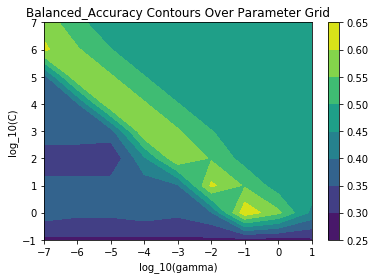

K-fold CV random state:	 14
Best fold balanced_accuracy:	0.8571
Best C:	1.00e+00
Best gamma:	6.00e+00


In [167]:
param_grid = {'estimator__C': np.logspace(-1,7,9), 
              'estimator__gamma': np.logspace(-7,1,9)
             }
C, gamma = blt.model_opt_exe(classifier='svc', 
                             aug_type='random', 
                             k=0, 
                             feat_data=X_enm, 
                             bin_data=bin_enm, 
                             save_fig_name=None, 
                             show_opt_plot=True, 
                             show_cnf_matrix=True, 
                             param_grid=param_grid)